# Capstone Project: Part 3 Natural Language Processing Preprocessing

In [1]:
# imports
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
import re
import unicodedata
import nltk
import os

## Importing and Exploring Data

In [2]:
# importing cleaned test and train datasets
train = pd.read_csv('../Data/processed_data/train.csv')
test = pd.read_csv('../Data/processed_data/test.csv')

In [3]:
train['description']=train['description'].apply(lambda x: re.sub('(Tiempo.+)| (Anodis.+)| (Espirito Santo.+)| (Campograndenews+)| (Informações de Whats.+)|(Pakistantoday.+)| (Radio TNN.+)| (LGBTT-Blogspot.+)| (Caribeafirmativo.+)| (salvatrucha\.elsalvador\.com.+)|(Native Out.+)|(Estado do Pernamb.+)|(Spiegel Online.+)|(La Prensa Gráfica.+)|(Aidsalliance\.org.+)|(Equipo de Corresponsales.+)|(Tribuna Popul.+)|(Gazeta Popul.+)|(Homofobia Mat.+)|(The Advocate.+)|(Otago Daily.+)(Fundación Cuban.+)|(Homofobia Mat.+)|(Notie Se.+)|(Correio de.+)|(El Sol de Sin.+)|(24horas.+)|(La Prensa Escrit.+)|(Examiner.+)|(Diario da.+)|(Diario do.+)|(Diário do.+)|(Il Messaggero.+)|(Islington Gazette.+)|(Diario La Verdad.+)|(BBC News.+)|(Eyewitness News.+)|(Asia Pacific Transgender.+)|(Times of India.+)|(O Globo.+)|(Geo\.tv.+)|(Sources\:.+)|(Globo.+)|(Jornal de.+)|(La Razon.+)|(Sources\:.+)|(The Buffalo News.+)|(Huffington Post.+)|(Blog do.+)|(Noticias Puebla.+)|(ABC 7.+)|(El Universal.+)(Portal Sida.+)|(ElsentidoG.+)|(Mailing-List.+)|(Equipo de Correspons.+)|(Publinews.+)|(Parautudo.+)|(Portal Sida.+)|(ElsentidoG.+)|(ANTRA.+)|(Mailing-List.+)|(Gaystarnews.+)|(Saltillo\-Noticias.+)|(Mix Brasil.+)|(mambaonline.+)|(Aidsalliance.+)|(The Dominion Post.+)|(Folha de.+)|(Pinknews.+)|(El Comer.+)|(Malay Mail.+)|(Univision.+)|(Ulisex.+)|(Equipo de Correspo.+)|(poenaroda.+)|(lgbtinewsturkey.+)|(Tvt project.+)|(Democracy Now.+)|(Dos Manza.+)|(Athos.+)|(El Univer.+)|(New Strait Times.+)|(WTHR.+)|(CERIGU.+)|(\[Observatório.+)|(Source\:.+)|(\[BROKEN LINK\])|(Transrespect.+)|(Facebook profile.+)|(IBTE.+)|(Pembehayat.+)|(El Heraldo.+)|(El heraldo.+)|(Grupo Gay da.+)|(ASTRA Rio.+)|(\\r)|(Centro de Apoyo.+)|(Travestis e Trans.+)|(TvT.+)|(http\S+)|(www\S+)|(\<.+\>)|([\S]{20,})|(\\n\>)|(\\n)', '', x))
test['description']=test['description'].apply(lambda x: re.sub('(Tiempo.+)| (Anodis.+)| (Espirito Santo.+)| (Campograndenews+)| (Informações de Whats.+)|(Pakistantoday.+)| (Radio TNN.+)| (LGBTT-Blogspot.+)| (Caribeafirmativo.+)| (salvatrucha\.elsalvador\.com.+)|(Native Out.+)|(Estado do Pernamb.+)|(Spiegel Online.+)|(La Prensa Gráfica.+)|(Aidsalliance\.org.+)|(Equipo de Corresponsales.+)|(Tribuna Popul.+)|(Gazeta Popul.+)|(Homofobia Mat.+)|(The Advocate.+)|(Otago Daily.+)(Fundación Cuban.+)|(Homofobia Mat.+)|(Notie Se.+)|(Correio de.+)|(El Sol de Sin.+)|(24horas.+)|(La Prensa Escrit.+)|(Examiner.+)|(Diario da.+)|(Diario do.+)|(Diário do.+)|(Il Messaggero.+)|(Islington Gazette.+)|(Diario La Verdad.+)|(BBC News.+)|(Eyewitness News.+)|(Asia Pacific Transgender.+)|(Times of India.+)|(O Globo.+)|(Geo\.tv.+)|(Sources\:.+)|(Globo.+)|(Jornal de.+)|(La Razon.+)|(Sources\:.+)|(The Buffalo News.+)|(Huffington Post.+)|(Blog do.+)|(Noticias Puebla.+)|(ABC 7.+)|(El Universal.+)(Portal Sida.+)|(ElsentidoG.+)|(Mailing-List.+)|(Equipo de Correspons.+)|(Publinews.+)|(Parautudo.+)|(Portal Sida.+)|(ElsentidoG.+)|(ANTRA.+)|(Mailing-List.+)|(Gaystarnews.+)|(Saltillo\-Noticias.+)|(Mix Brasil.+)|(mambaonline.+)|(Aidsalliance.+)|(The Dominion Post.+)|(Folha de.+)|(Pinknews.+)|(El Comer.+)|(Malay Mail.+)|(Univision.+)|(Ulisex.+)|(Equipo de Correspo.+)|(poenaroda.+)|(lgbtinewsturkey.+)|(Tvt project.+)|(Democracy Now.+)|(Dos Manza.+)|(Athos.+)|(El Univer.+)|(New Strait Times.+)|(WTHR.+)|(CERIGU.+)|(\[Observatório.+)|(Source\:.+)|(\[BROKEN LINK\])|(Transrespect.+)|(Facebook profile.+)|(IBTE.+)|(Pembehayat.+)|(El Heraldo.+)|(El heraldo.+)|(Grupo Gay da.+)|(ASTRA Rio.+)|(\\r)|(Centro de Apoyo.+)|(Travestis e Trans.+)|(TvT.+)|(http\S+)|(www\S+)|(\<.+\>)|([\S]{20,})|(\\n\>)|(\\n)', '', x))


## Natural Language Processing Parsing

In [4]:
# making list of columns for primary NLP parsing
nlp_column = ['description']

### Tokenize text data

In [5]:
# making function to remove whitespace, keep alphabet characters, and lowercase 
def tokendata(df,col_list):
    token = RegexpTokenizer(r'[\w\'\']+')
    for j in col_list:
        token_items = [token.tokenize(i.lower()) for i in df[j]]
        df[f'tokenized_{j}'] = token_items
    return df

In [6]:
# tokenize combined dataframes
train = tokendata(train, nlp_column)
test = tokendata(test,nlp_column)

### Lemmatize text data

In [7]:
cols_list=['tokenized_description']

In [8]:
def lemmad(words):
    lemma=WordNetLemmatizer()
    lemmad_row = [lemma.lemmatize(word) for word in words]
    return lemmad_row

In [9]:
# making function to lemmatize the text data
train['lemmatized_tokenized_description']=train['tokenized_description'].apply(lemmad)
test['lemmatized_tokenized_description']=test['tokenized_description'].apply(lemmad)

# EDA

In [10]:
train1=train.copy()
test1=test.copy()

In [11]:
train1['length']=[len(x) for x in train1['lemmatized_tokenized_description']]
test1['length']=[len(x) for x in test1['lemmatized_tokenized_description']]

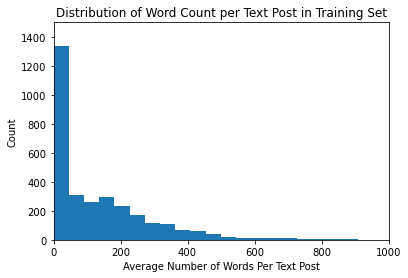

In [12]:
plt.hist(train1['length'], bins=40)
plt.xlabel('Average Number of Words Per Text Post')
plt.ylabel('Count')
plt.title('Distribution of Word Count per Text Post in Training Set')
plt.xlim(0,1000)
plt.ylim(0,1500);
# plt.savefig('wordcountdistributiontrain')

n. This figure represents the distribution of word count per text post in training set

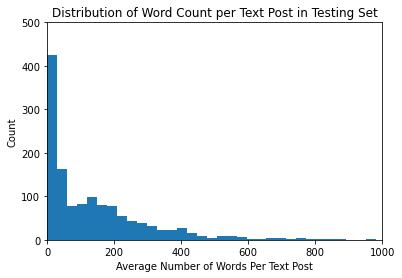

In [13]:
plt.hist(test1['length'], bins=40)
plt.xlabel('Average Number of Words Per Text Post')
plt.ylabel('Count')
plt.title('Distribution of Word Count per Text Post in Testing Set')
plt.xlim(0,1000)
plt.ylim(0,500);
# plt.savefig('wordcountdistributiontest')

n. This figure represents the distribution of word count per text post in testing set

In [14]:
train['lemmatized_tokenized_description'] = [' '.join(l) for l in train['lemmatized_tokenized_description']]
test['lemmatized_tokenized_description'] = [' '.join(l) for l in test['lemmatized_tokenized_description']]

## Exporting to CSV

In [15]:
# export nlp train Dataframe
# train.to_csv('../Data/processed_data/nlp_train.csv',index=False)

In [16]:
# export nlp test Dataframe
# test.to_csv('../Data/processed_data/nlp_test.csv',index=False)